# WFC3 Figure 8 Ghost Classification using GoogLeNet
---

The purpose of the notebook is to demonstrate how to use a DeepWFC3 model to predict if a WFC3 image contains a Figure 8 Ghost. 

## Imports <a id="imports"></a>

If you are running this notebook in Jupyter, this notebook assumes you created the virtual environment defined in `environment.yml`. If not, close this notebook and run the following lines in a terminal window:

`conda env create -f environment.yml`

`conda activate deepwfc3_env`

We import the following libraries:
- *numpy* for handling arrays
- *matplotlib* for plotting
- *torch* as our machine learning framework

We also import functions from `utils.py` to load the model and plot saliency maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

from utils import load_wfc3_uvis_figure8_model, saliency_map

## Load Data

`examples.npz` is a compressed numpy file containing two WFC3 images post processing pipeline (see (insert py file name here)). The first image is a null image of the galaxy N5643 (idgg69pmq) and the second is the globular cluster NGC-6752 (ibhf01sjq), which contains a figure 8 ghost.

We load the images using `np.load()`.

In [2]:
example = torch.Tensor(np.load('examples.npz')['examples'])
example_0 = example[0].reshape(1,1,256,256)
example_1 = example[1].reshape(1,1,256,256)

## Load Model

This model uses 3 convolutional layers and 3 fully connected layers.  The model was first trained on synthetic data where figure 8's were inserted onto images randomly [ISR REF HERE].  After converging to a high accuracy on the synthetic data, the parameters of the convolutional layers were frozen, though the parameters were allowed to vary.  The fully connected layers were then retrained on real data.

The model is saved as `wfc3_uvis_figure8_model_c.torch` and can be loaded using `load_wfc3_uvis_figure8_model()`.

In [3]:
model = load_wfc3_uvis_figure8_model('wfc3_uvis_figure8_model_c.torch')

## Predict Examples

To predict the example classifications, we use them as arguments for `model()`, which returns the last two output neurons. The index of the greatest neuron output is the prediction.

In [5]:
pred_0 = model(example_0)
pred_1 = model(example_1)

/Users/vbajaj/anaconda2/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459046073/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
print ('Example 0 Output Neurons: {}'.format(pred_0))
print ('Example 1 Output Neurons: {}'.format(pred_1))

Example 0 Output Neurons: tensor([[-0.0573, -4.6405]])
Example 1 Output Neurons: tensor([[-11.1430,   4.4422]])


## View Saliency Maps

We can view the [saliency maps](https://arxiv.org/pdf/1312.6034.pdf) our model produces for the examples by using `saliency_map()`, which prints the prediction probabilities, and plots the original image and the saliency map.

Null Probability: 0.9899
Figure 8 Probability: 0.0101
Prediction: 0


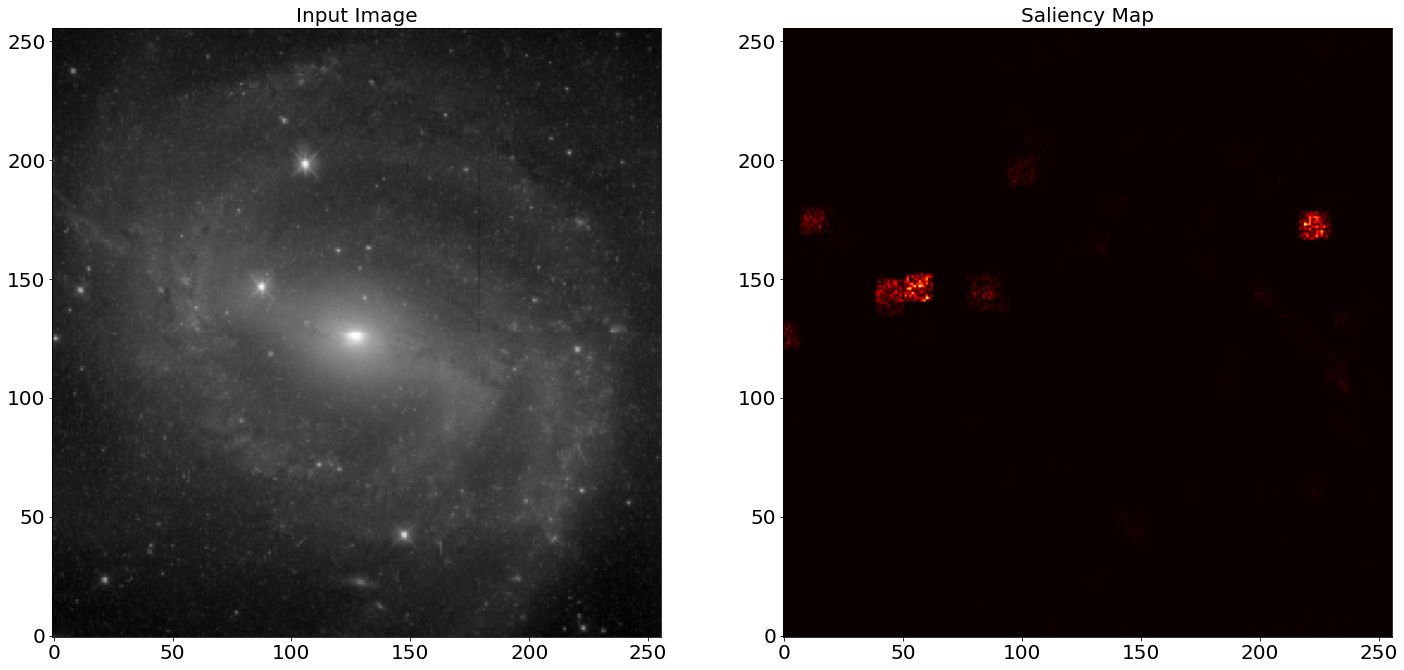

Null Probability: 0.0000
Figure 8 Probability: 1.0000
Prediction: 1


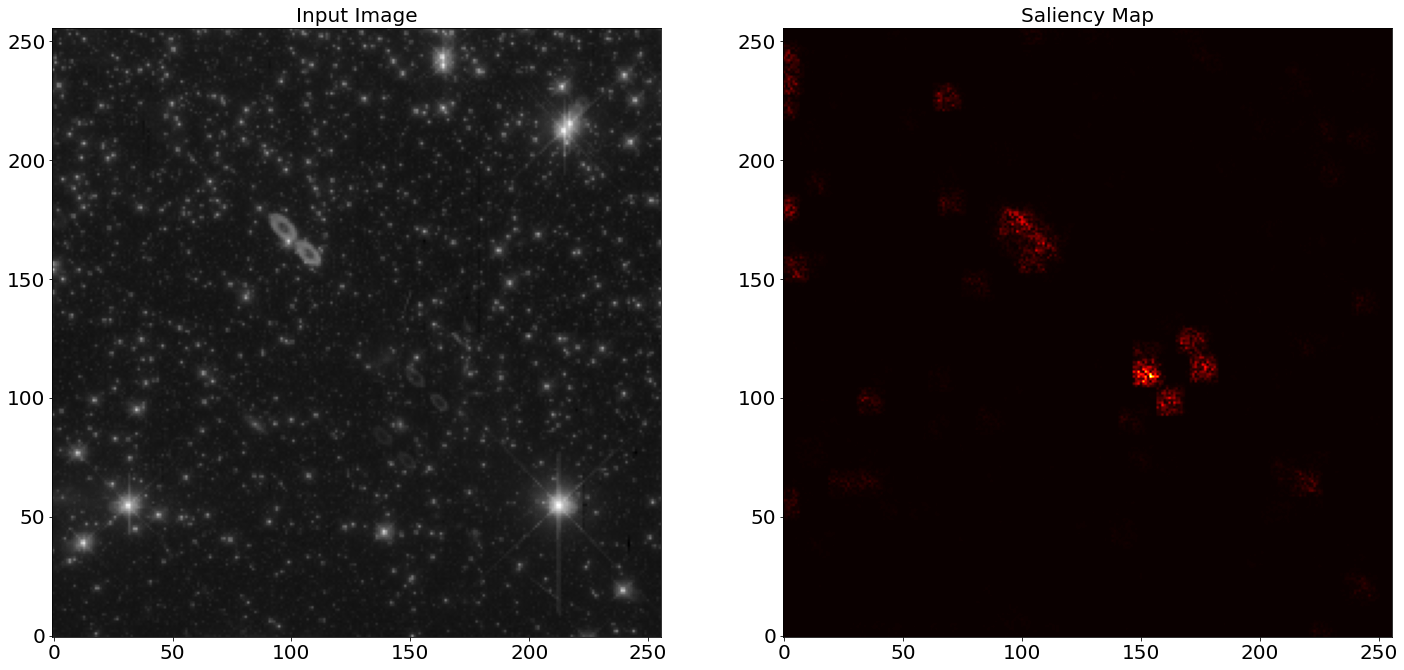

In [7]:
sm = saliency_map(model, example[0].reshape(1,1,256,256))
sm = saliency_map(model, example[1].reshape(1,1,256,256))

## Conclusions <a id="con"></a>

Thank you for walking through this notebook. Now you should be more familiar with using our model to predict if figure 8 ghosts are on WFC3 images.

## About this Notebook <a id="about"></a>

**Author:** Varun Bajaj, Fred Dauphin, DeepWFC3

**Updated on:** 2022-01-14

## Citations <a id="cite"></a>

If you use `numpy`, `matplotlib`, or `torch` for published research, please cite the authors. Follow these links for more information about citing `numpy`, `matplotlib`, and `torch`:

* [Citing `numpy`](https://numpy.org/doc/stable/license.html)
* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/license.html#:~:text=Matplotlib%20only%20uses%20BSD%20compatible,are%20acceptable%20in%20matplotlib%20toolkits.)
* [Citing `torch`](https://github.com/pytorch/pytorch/blob/master/LICENSE)